# Actividad Clase 01: Análisis Exploratorio de Datos (EDA) - RetailBoost

---

## 📋 Contexto del Problema

**RetailBoost** es una empresa que necesita construir un modelo de Machine Learning para **predecir si un cliente realizará una compra** en su plataforma. La variable objetivo es binaria:

- **compró = 1**: El cliente realizó una compra
- **compró = 0**: El cliente NO realizó una compra

Este es un problema de **clasificación supervisada**, donde tenemos datos históricos etiquetados (sabemos qué clientes compraron y cuáles no) y queremos aprender patrones para predecir comportamientos futuros.

---

## 🎯 Objetivo de este Notebook

Antes de entrenar cualquier modelo de Machine Learning, es fundamental realizar un **Análisis Exploratorio de Datos (EDA)**. Este proceso nos permite:

1. **Comprender la estructura** de nuestros datos
2. **Identificar problemas de calidad** (valores nulos, outliers, errores)
3. **Descubrir patrones y relaciones** entre variables
4. **Preparar y transformar** los datos para el modelado
5. **Seleccionar las características más relevantes** (feature selection)

Recordemos los conceptos clave de la clase:

- **Características (Features)**: Variables de entrada que usamos para hacer predicciones (edad, ingresos, región, frecuencia de visitas)
- **Target**: Variable objetivo que queremos predecir (compró)
- **Ingeniería de Características**: Proceso de transformar datos crudos en features útiles para el modelo

---

## 📚 Librerías Necesarias

Vamos a trabajar principalmente con **Pandas** (manipulación de datos) y **NumPy** (operaciones numéricas), como se solicita en la consigna.

In [1]:
# Importamos las librerías principales para el análisis de datos
import pandas as pd  # Pandas: librería para manipulación y análisis de datos estructurados
import numpy as np   # NumPy: librería para operaciones matemáticas y manejo de arrays

# Librerías adicionales para visualización (nos ayudarán a entender mejor los datos)
import matplotlib.pyplot as plt  # Matplotlib: librería base para crear gráficos
import seaborn as sns           # Seaborn: librería de visualización estadística (construida sobre matplotlib)
from IPython.display import display  # IPython display: para mostrar DataFrames de forma más legible

# Configuración de visualización para que los gráficos se vean más profesionales
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo visual para los gráficos
sns.set_palette("husl")                  # Paleta de colores atractiva
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño por defecto de los gráficos
plt.rcParams['font.size'] = 10           # Tamaño de fuente por defecto

# Configuración de pandas para mostrar más filas y columnas en la salida
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', 100)      # Mostrar hasta 100 filas
pd.set_option('display.float_format', '{:.2f}'.format)  # Formatear números flotantes a 2 decimales

# Para reproducibilidad: establecemos una semilla aleatoria
# Esto garantiza que los resultados sean consistentes cada vez que ejecutemos el código
np.random.seed(42)

print("✅ Librerías importadas correctamente")
print(f"Versión de Pandas: {pd.__version__}")
print(f"Versión de NumPy: {np.__version__}")

✅ Librerías importadas correctamente
Versión de Pandas: 2.3.3
Versión de NumPy: 1.26.4


In [2]:
# Ignorar warnings para una salida más limpia
import warnings
warnings.filterwarnings('ignore')

---

## 1️⃣ CARGA Y EXPLORACIÓN INICIAL DEL DATASET

El primer paso en cualquier proyecto de Data Science es **cargar los datos** y hacer una exploración inicial para entender con qué estamos trabajando.

### ¿Qué buscamos identificar?

- Número de registros (filas) y variables (columnas)
- Tipos de datos de cada columna
- Primeras y últimas filas para ver ejemplos reales
- Presencia de valores nulos o anómalos

In [3]:
# Cargamos el dataset desde el archivo CSV
# La ruta es relativa a la ubicación del notebook
df = pd.read_csv('../data/retailboost_customers.csv')

# Mostramos información básica sobre la carga
print("="*80)
print("📊 DATASET CARGADO EXITOSAMENTE")
print("="*80)
print(f"\n🔢 Dimensiones del dataset: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\n💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

📊 DATASET CARGADO EXITOSAMENTE

🔢 Dimensiones del dataset: 500 filas × 6 columnas

💾 Memoria utilizada: 45.35 KB


In [4]:
# Visualizamos las primeras 10 filas del dataset
# Esto nos da una idea de cómo lucen nuestros datos y qué tipo de información contienen
print("\n📋 Primeras 10 filas del dataset:")
print("="*80)
df.head(10)


📋 Primeras 10 filas del dataset:


,customer_id,edad,ingresos_mensuales,region,frecuencia_visitas,compró
0,1,56,3697.72,Norte,2,1
1,2,69,2825.97,Este,15,0
2,3,46,784.50,Este,14,0
3,4,32,1612.61,Oeste,11,0
4,5,60,3013.53,Este,3,0
5,6,25,1433.86,Sur,17,1
6,7,38,2355.06,Sur,12,1
7,8,56,2619.71,Este,15,1
8,9,36,1258.46,Este,16,0
9,10,40,1952.38,Oeste,5,0


In [5]:
# Visualizamos las últimas 5 filas
# Es importante revisar también el final del dataset por si hay problemas de carga
print("\n📋 Últimas 5 filas del dataset:")
print("="*80)
df.tail()


📋 Últimas 5 filas del dataset:


,customer_id,edad,ingresos_mensuales,region,frecuencia_visitas,compró
495,496,65,1395.69,Norte,2,1
496,497,42,1510.79,Norte,12,1
497,498,57,874.67,Este,2,0
498,499,62,1261.41,Oeste,6,1
499,500,18,918.65,Oeste,17,1


In [6]:
# El método .info() nos proporciona información técnica muy valiosa:
# - Número total de entradas (filas)
# - Nombres de las columnas
# - Cantidad de valores no-nulos por columna (detecta valores faltantes)
# - Tipo de dato de cada columna (int, float, object, etc.)
# - Uso de memoria
print("\n🔍 Información técnica del dataset:")
print("="*80)
df.info()


🔍 Información técnica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    int64  
 1   edad                500 non-null    int64  
 2   ingresos_mensuales  485 non-null    float64
 3   region              485 non-null    object 
 4   frecuencia_visitas  500 non-null    int64  
 5   compró              500 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 23.6+ KB


### 📝 Observaciones Iniciales

Del análisis anterior, podemos observar:

**Variables del dataset:**
1. **customer_id**: Identificador único del cliente (no es útil para predicción)
2. **edad**: Edad del cliente en años (variable numérica)
3. **ingresos_mensuales**: Ingresos mensuales en unidades monetarias (variable numérica)
4. **region**: Región geográfica del cliente (variable categórica)
5. **frecuencia_visitas**: Número de visitas al sitio web (variable numérica)
6. **compró**: Variable objetivo - indica si el cliente compró (1) o no (0)

**Tipos de variables según ML:**
- **Variables numéricas continuas**: ingresos_mensuales
- **Variables numéricas discretas**: edad, frecuencia_visitas
- **Variables categóricas nominales**: region
- **Variable objetivo binaria**: compró

In [7]:
# Análisis de valores nulos (missing values)
# Los valores nulos son un problema común en datos reales y debemos identificarlos
print("\n🔍 ANÁLISIS DE VALORES NULOS")
print("="*80)

# Contamos valores nulos por columna
valores_nulos = df.isnull().sum()

# Calculamos el porcentaje de valores nulos
porcentaje_nulos = (valores_nulos / len(df)) * 100

# Creamos un DataFrame resumen para mejor visualización
resumen_nulos = pd.DataFrame({
    'Columna': valores_nulos.index,
    'Valores_Nulos': valores_nulos.values,
    'Porcentaje': porcentaje_nulos.values
})

# Ordenamos por cantidad de nulos de mayor a menor
resumen_nulos = resumen_nulos.sort_values('Valores_Nulos', ascending=False)

print(resumen_nulos.to_string(index=False))
print(f"\n📊 Total de registros: {len(df)}")
print(f"📊 Columnas con valores nulos: {(valores_nulos > 0).sum()}")


🔍 ANÁLISIS DE VALORES NULOS
           Columna  Valores_Nulos  Porcentaje
ingresos_mensuales             15        3.00
            region             15        3.00
       customer_id              0        0.00
              edad              0        0.00
frecuencia_visitas              0        0.00
            compró              0        0.00

📊 Total de registros: 500
📊 Columnas con valores nulos: 2


In [8]:
# Análisis de valores duplicados
# Los duplicados pueden sesgar nuestro análisis y modelo
print("\n🔍 ANÁLISIS DE VALORES DUPLICADOS")
print("="*80)

# Verificamos si hay filas completamente duplicadas
duplicados_totales = df.duplicated().sum()
print(f"Filas completamente duplicadas: {duplicados_totales}")

# Verificamos si hay customer_id duplicados (no debería haber)
duplicados_id = df['customer_id'].duplicated().sum()
print(f"Customer IDs duplicados: {duplicados_id}")

if duplicados_id > 0:
    print("\n⚠️ ALERTA: Hay customer_ids duplicados. Revisemos:")
    print(df[df['customer_id'].duplicated(keep=False)].sort_values('customer_id'))


🔍 ANÁLISIS DE VALORES DUPLICADOS
Filas completamente duplicadas: 0
Customer IDs duplicados: 0


---

## 2️⃣ IDENTIFICACIÓN DE DISTRIBUCIONES

En esta sección analizaremos cómo se distribuyen nuestras variables. Entender las distribuciones es crucial porque:

1. **Detectamos outliers** (valores atípicos que pueden ser errores)
2. **Identificamos sesgos** en los datos (distribuciones no balanceadas)
3. **Decidimos qué transformaciones aplicar** (normalización, estandarización)
4. **Verificamos supuestos** de algunos algoritmos de ML

### 2.1 Estadísticas Descriptivas de Variables Numéricas

In [9]:
# El método .describe() calcula estadísticas descriptivas para variables numéricas:
# - count: cantidad de valores no-nulos
# - mean: promedio (media aritmética)
# - std: desviación estándar (medida de dispersión)
# - min: valor mínimo
# - 25%, 50%, 75%: cuartiles (percentiles 25, 50 y 75)
# - max: valor máximo

print("\n📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*80)
df.describe()


📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,customer_id,edad,ingresos_mensuales,frecuencia_visitas,compró
count,500.00,500.00,485.00,500.00,500.00
mean,250.50,44.22,1972.53,9.93,0.39
std,144.48,15.04,797.39,5.43,0.49
min,1.00,18.00,-593.01,1.00,0.00
25%,125.75,32.00,1425.24,5.00,0.00
50%,250.50,45.00,1973.84,10.00,0.00
75%,375.25,57.00,2502.68,15.00,1.00
max,500.00,69.00,4463.10,19.00,1.00


In [10]:
# Análisis más detallado con estadísticas adicionales
print("\n📊 ESTADÍSTICAS ADICIONALES")
print("="*80)

# Seleccionamos solo las columnas numéricas (excluyendo customer_id que es solo un identificador)
columnas_numericas = ['edad', 'ingresos_mensuales', 'frecuencia_visitas']

for col in columnas_numericas:
    print(f"\n📈 Variable: {col.upper()}")
    print("-" * 60)
    
    # Calculamos estadísticas robustas que no se ven afectadas por outliers
    mediana = df[col].median()  # Mediana: valor central, más robusta que la media
    moda = df[col].mode()[0] if not df[col].mode().empty else "Sin moda"  # Valor más frecuente
    rango = df[col].max() - df[col].min()  # Diferencia entre máximo y mínimo
    
    # Rango intercuartílico (IQR): mide la dispersión del 50% central de los datos
    q1 = df[col].quantile(0.25)  # Primer cuartil (25%)
    q3 = df[col].quantile(0.75)  # Tercer cuartil (75%)
    iqr = q3 - q1                # IQR = Q3 - Q1
    
    # Coeficiente de variación: desviación estándar relativa a la media (útil para comparar variables)
    cv = (df[col].std() / df[col].mean()) * 100 if df[col].mean() != 0 else 0
    
    # Asimetría (skewness): indica si la distribución está sesgada
    # skew = 0: simétrica
    # skew > 0: cola a la derecha (muchos valores bajos, pocos altos)
    # skew < 0: cola a la izquierda (muchos valores altos, pocos bajos)
    asimetria = df[col].skew()
    
    # Curtosis: indica qué tan "puntiaguda" es la distribución
    # kurtosis > 0: más puntiaguda que la normal (leptocúrtica)
    # kurtosis < 0: más plana que la normal (platicúrtica)
    curtosis = df[col].kurtosis()
    
    print(f"  Mediana: {mediana:.2f}")
    print(f"  Moda: {moda}")
    print(f"  Rango: {rango:.2f}")
    print(f"  IQR (Q3-Q1): {iqr:.2f}")
    print(f"  Coeficiente de Variación: {cv:.2f}%")
    print(f"  Asimetría (Skewness): {asimetria:.2f}")
    print(f"  Curtosis: {curtosis:.2f}")


📊 ESTADÍSTICAS ADICIONALES

📈 Variable: EDAD
------------------------------------------------------------
  Mediana: 45.00
  Moda: 50
  Rango: 51.00
  IQR (Q3-Q1): 25.00
  Coeficiente de Variación: 34.00%
  Asimetría (Skewness): -0.11
  Curtosis: -1.11

📈 Variable: INGRESOS_MENSUALES
------------------------------------------------------------
  Mediana: 1973.84
  Moda: -593.01
  Rango: 5056.11
  IQR (Q3-Q1): 1077.44
  Coeficiente de Variación: 40.42%
  Asimetría (Skewness): 0.04
  Curtosis: -0.06

📈 Variable: FRECUENCIA_VISITAS
------------------------------------------------------------
  Mediana: 10.00
  Moda: 12
  Rango: 18.00
  IQR (Q3-Q1): 10.00
  Coeficiente de Variación: 54.69%
  Asimetría (Skewness): -0.02
  Curtosis: -1.20


### 2.2 Visualización de Distribuciones Numéricas

Los histogramas y boxplots nos permiten visualizar la distribución de las variables numéricas de forma intuitiva.

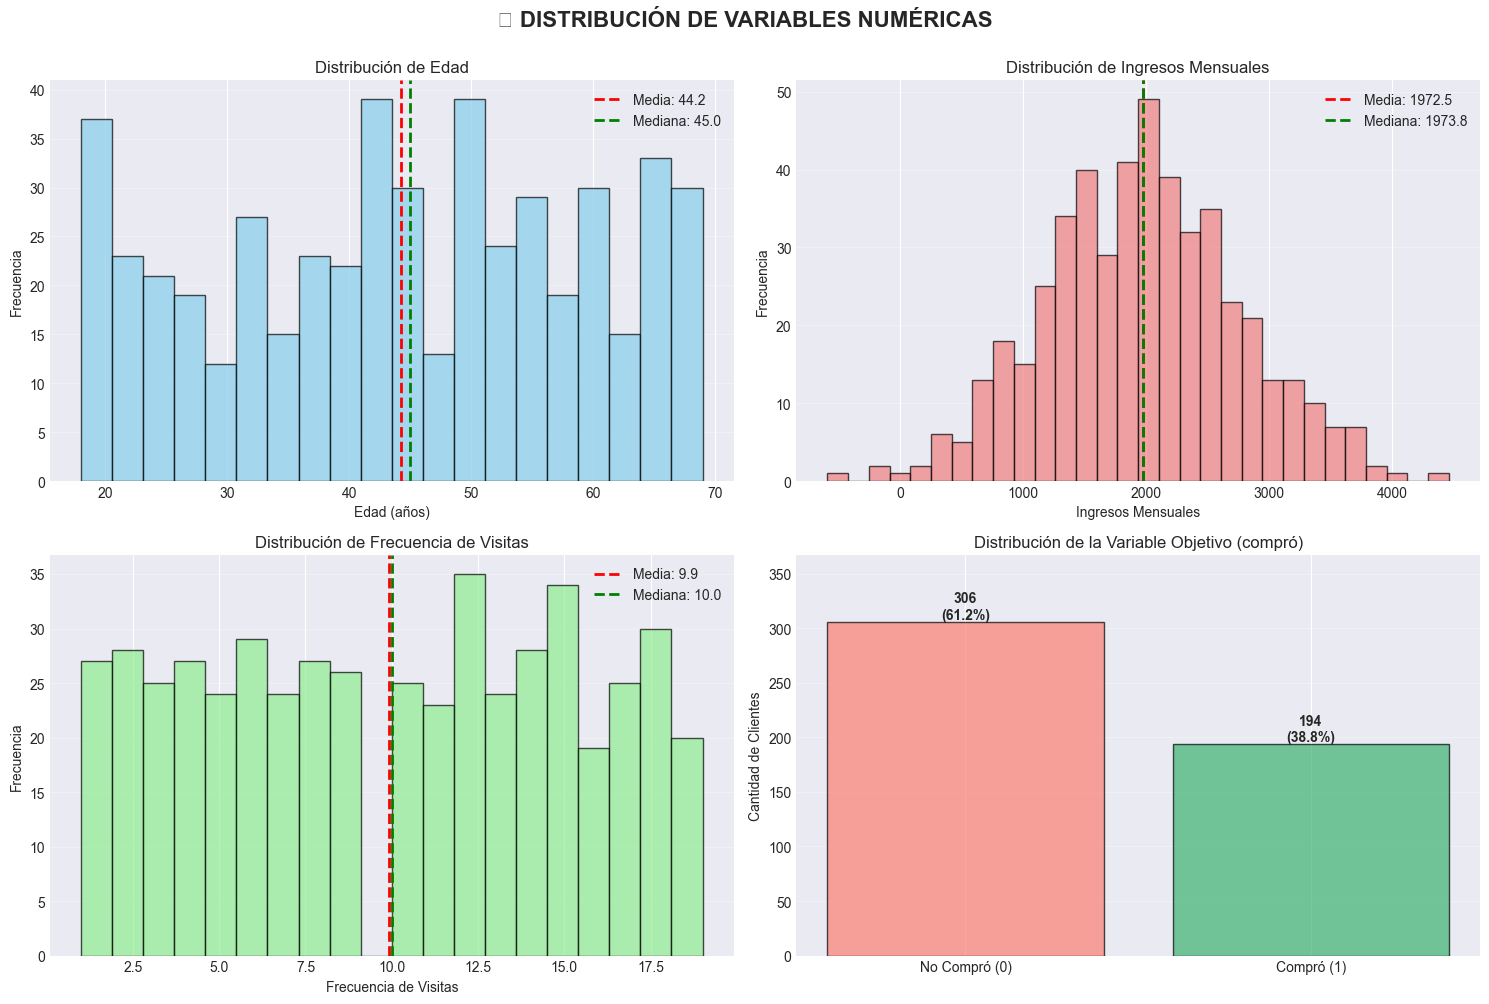


⚖️ BALANCE DE CLASES (Variable Objetivo)
compró
0    306
1    194
Name: count, dtype: int64

Porcentajes:
compró
0   61.20
1   38.80
Name: proportion, dtype: float64


In [11]:
# Creamos histogramas para cada variable numérica
# Los histogramas muestran la frecuencia de valores en diferentes rangos (bins)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Creamos una grilla de 2x2 subgráficos
fig.suptitle('📊 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS', fontsize=16, fontweight='bold', y=1.00)

# Histograma de EDAD
axes[0, 0].hist(df['edad'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Edad (años)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Edad')
axes[0, 0].axvline(df['edad'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["edad"].mean():.1f}')
axes[0, 0].axvline(df['edad'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["edad"].median():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Histograma de INGRESOS MENSUALES
axes[0, 1].hist(df['ingresos_mensuales'].dropna(), bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Ingresos Mensuales')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Ingresos Mensuales')
axes[0, 1].axvline(df['ingresos_mensuales'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["ingresos_mensuales"].mean():.1f}')
axes[0, 1].axvline(df['ingresos_mensuales'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["ingresos_mensuales"].median():.1f}')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Histograma de FRECUENCIA DE VISITAS
axes[1, 0].hist(df['frecuencia_visitas'].dropna(), bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Frecuencia de Visitas')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Frecuencia de Visitas')
axes[1, 0].axvline(df['frecuencia_visitas'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["frecuencia_visitas"].mean():.1f}')
axes[1, 0].axvline(df['frecuencia_visitas'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["frecuencia_visitas"].median():.1f}')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Histograma de VARIABLE OBJETIVO (compró)
compra_counts = df['compró'].value_counts()  # Contamos cuántos compraron (1) y no compraron (0)
axes[1, 1].bar(['No Compró (0)', 'Compró (1)'], compra_counts.values, color=['salmon', 'mediumseagreen'], edgecolor='black', alpha=0.7)
axes[1, 1].set_ylabel('Cantidad de Clientes')
axes[1, 1].set_title('Distribución de la Variable Objetivo (compró)')
axes[1, 1].set_ylim(0, max(compra_counts.values) * 1.2)  # Ajustamos el límite del eje Y

# Añadimos etiquetas con los valores exactos y porcentajes
for i, (bar, count) in enumerate(zip(axes[1, 1].patches, compra_counts.values)):
    height = bar.get_height()
    porcentaje = (count / len(df)) * 100
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(count)}\n({porcentaje:.1f}%)',
                   ha='center', va='bottom', fontweight='bold')

axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()  # Ajusta automáticamente el espaciado entre subgráficos
plt.show()

# Calculamos el balance de clases (importante para clasificación)
print("\n⚖️ BALANCE DE CLASES (Variable Objetivo)")
print("="*80)
print(df['compró'].value_counts())
print("\nPorcentajes:")
print(df['compró'].value_counts(normalize=True) * 100)

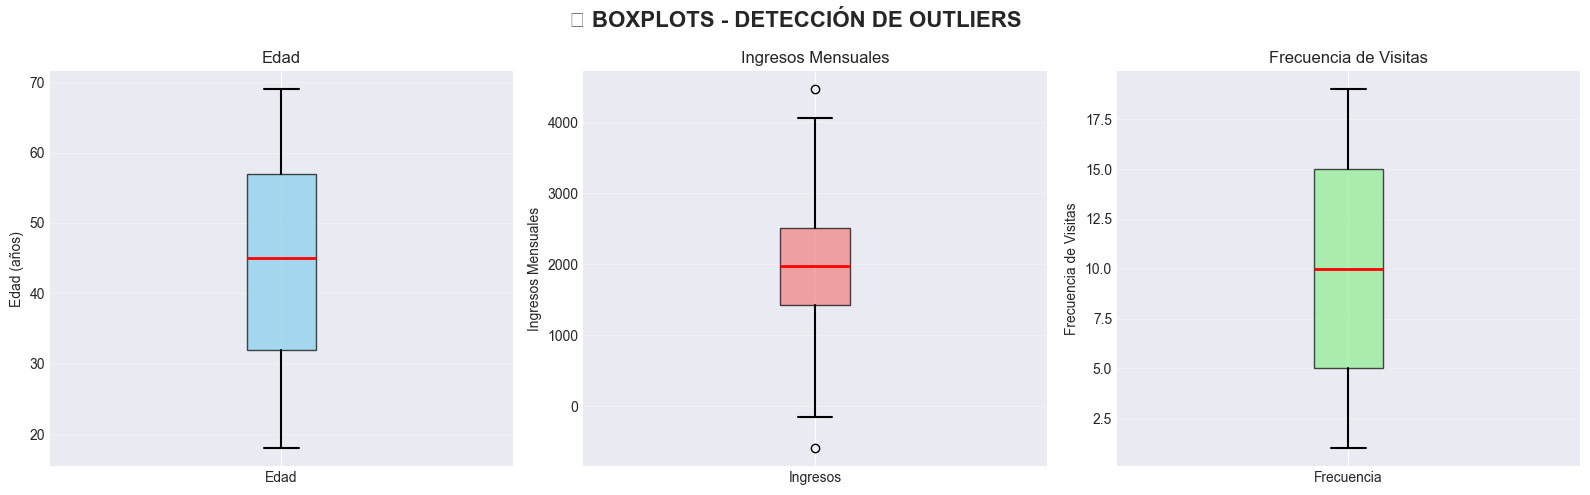

In [12]:
# Boxplots (Diagramas de Caja)
# Los boxplots son excelentes para:
# 1. Identificar outliers (puntos fuera de los "bigotes")
# 2. Ver la mediana (línea central de la caja)
# 3. Ver los cuartiles Q1 y Q3 (límites de la caja)
# 4. Comparar distribuciones entre grupos

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('📦 BOXPLOTS - DETECCIÓN DE OUTLIERS', fontsize=16, fontweight='bold')

# Boxplot de EDAD
bp1 = axes[0].boxplot(df['edad'].dropna(), vert=True, patch_artist=True, 
                       boxprops=dict(facecolor='skyblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[0].set_ylabel('Edad (años)')
axes[0].set_title('Edad')
axes[0].set_xticklabels(['Edad'])
axes[0].grid(axis='y', alpha=0.3)

# Boxplot de INGRESOS MENSUALES
bp2 = axes[1].boxplot(df['ingresos_mensuales'].dropna(), vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightcoral', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Ingresos Mensuales')
axes[1].set_title('Ingresos Mensuales')
axes[1].set_xticklabels(['Ingresos'])
axes[1].grid(axis='y', alpha=0.3)

# Boxplot de FRECUENCIA DE VISITAS
bp3 = axes[2].boxplot(df['frecuencia_visitas'].dropna(), vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightgreen', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[2].set_ylabel('Frecuencia de Visitas')
axes[2].set_title('Frecuencia de Visitas')
axes[2].set_xticklabels(['Frecuencia'])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Identificación de outliers usando el método IQR (Rango Intercuartílico)
# Regla estándar: Un valor es outlier si está fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

print("\n🔍 DETECCIÓN DE OUTLIERS (Método IQR)")
print("="*80)

def detectar_outliers_iqr(dataframe, columna):
    """
    Detecta outliers en una columna usando el método del rango intercuartílico (IQR).
    
    Parámetros:
    - dataframe: DataFrame de pandas
    - columna: nombre de la columna a analizar
    
    Retorna:
    - outliers: Series de pandas con los valores atípicos
    """
    # Calculamos Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = dataframe[columna].quantile(0.25)
    Q3 = dataframe[columna].quantile(0.75)
    
    # Calculamos el rango intercuartílico
    IQR = Q3 - Q1
    
    # Definimos los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificamos los outliers (valores fuera de los límites)
    outliers = dataframe[(dataframe[columna] < limite_inferior) | (dataframe[columna] > limite_superior)][columna]
    
    return outliers, limite_inferior, limite_superior

# Analizamos cada variable numérica
for col in columnas_numericas:
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(df, col)
    print(f"\n📊 Variable: {col.upper()}")
    print("-" * 60)
    print(f"  Límite Inferior: {lim_inf:.2f}")
    print(f"  Límite Superior: {lim_sup:.2f}")
    print(f"  Cantidad de outliers: {len(outliers)} ({(len(outliers)/len(df))*100:.2f}% del dataset)")
    
    if len(outliers) > 0:
        print(f"  Valores atípicos encontrados:")
        print(f"    - Mínimo outlier: {outliers.min():.2f}")
        print(f"    - Máximo outlier: {outliers.max():.2f}")


🔍 DETECCIÓN DE OUTLIERS (Método IQR)

📊 Variable: EDAD
------------------------------------------------------------
  Límite Inferior: -5.50
  Límite Superior: 94.50
  Cantidad de outliers: 0 (0.00% del dataset)

📊 Variable: INGRESOS_MENSUALES
------------------------------------------------------------
  Límite Inferior: -190.92
  Límite Superior: 4118.84
  Cantidad de outliers: 2 (0.40% del dataset)
  Valores atípicos encontrados:
    - Mínimo outlier: -593.01
    - Máximo outlier: 4463.10

📊 Variable: FRECUENCIA_VISITAS
------------------------------------------------------------
  Límite Inferior: -10.00
  Límite Superior: 30.00
  Cantidad de outliers: 0 (0.00% del dataset)


### 2.3 Análisis de Variables Categóricas

In [14]:
# Análisis de la variable categórica 'region'
print("\n🗺️ ANÁLISIS DE VARIABLE CATEGÓRICA: REGIÓN")
print("="*80)

# Contamos la frecuencia de cada categoría
print("\nFrecuencias absolutas:")
print(df['region'].value_counts())

print("\nFrecuencias relativas (porcentajes):")
print(df['region'].value_counts(normalize=True) * 100)

print(f"\nCantidad de categorías únicas: {df['region'].nunique()}")
print(f"Categorías: {df['region'].unique()}")


🗺️ ANÁLISIS DE VARIABLE CATEGÓRICA: REGIÓN

Frecuencias absolutas:
region
Norte    134
Este     127
Sur      117
Oeste    107
Name: count, dtype: int64

Frecuencias relativas (porcentajes):
region
Norte   27.63
Este    26.19
Sur     24.12
Oeste   22.06
Name: proportion, dtype: float64

Cantidad de categorías únicas: 4
Categorías: ['Norte' 'Este' 'Oeste' 'Sur' nan]


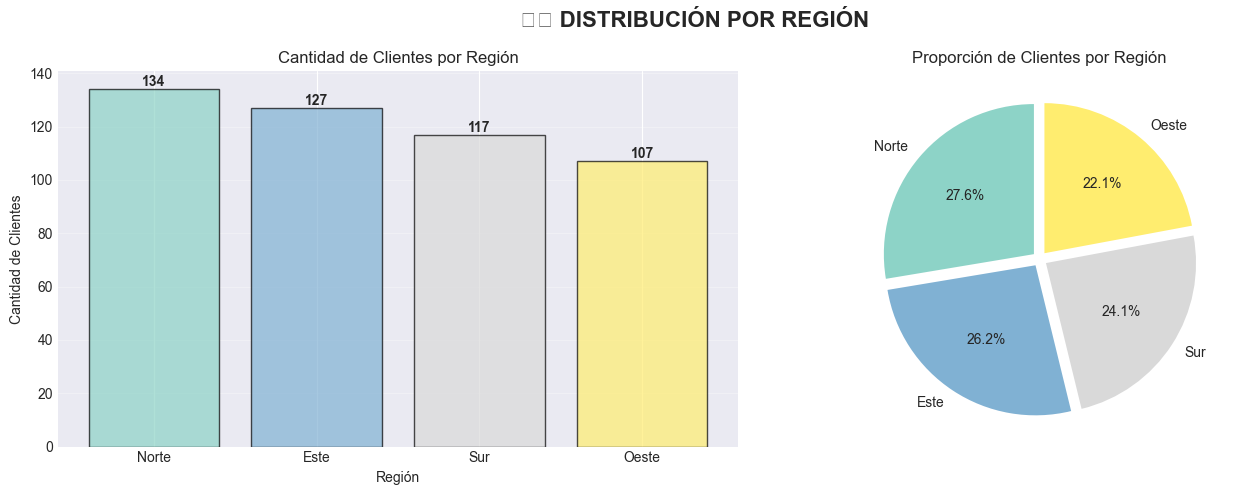

In [15]:
# Visualización de la distribución de regiones
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('🗺️ DISTRIBUCIÓN POR REGIÓN', fontsize=16, fontweight='bold')

# Gráfico de barras
region_counts = df['region'].value_counts()
colors_region = plt.cm.Set3(np.linspace(0, 1, len(region_counts)))  # Paleta de colores

axes[0].bar(region_counts.index, region_counts.values, color=colors_region, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Región')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_title('Cantidad de Clientes por Región')
axes[0].grid(axis='y', alpha=0.3)

# Añadimos etiquetas con valores
for i, (bar, count) in enumerate(zip(axes[0].patches, region_counts.values)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}',
                ha='center', va='bottom', fontweight='bold')

# Gráfico de torta (pie chart)
axes[1].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%',
           colors=colors_region, startangle=90, explode=[0.05]*len(region_counts))
axes[1].set_title('Proporción de Clientes por Región')

plt.tight_layout()
plt.show()

---

## 3️⃣ LIMPIEZA DE DATOS NULOS

Los valores nulos (missing values) son un problema común en datos reales. Debemos decidir cómo manejarlos:

**Estrategias comunes:**
1. **Eliminar filas**: Si hay pocos nulos (< 5% generalmente)
2. **Imputar con media/mediana**: Para variables numéricas
3. **Imputar con moda**: Para variables categóricas
4. **Imputación más sofisticada**: Usar modelos predictivos (KNN, regresión, etc.)

La decisión depende de:
- **Cantidad de nulos**: ¿Cuántos datos perderíamos?
- **Patrón de nulos**: ¿Son aleatorios o sistemáticos?
- **Importancia de la variable**: ¿Es crítica para la predicción?

In [16]:
# Análisis detallado de valores nulos antes de limpiar
print("\n🔍 ANÁLISIS DETALLADO DE VALORES NULOS")
print("="*80)

# Revisemos las filas con valores nulos
filas_con_nulos = df[df.isnull().any(axis=1)]
print(f"\nTotal de filas con al menos un valor nulo: {len(filas_con_nulos)}")
print(f"Porcentaje del dataset: {(len(filas_con_nulos)/len(df))*100:.2f}%")

if len(filas_con_nulos) > 0:
    print("\nPrimeras 10 filas con valores nulos:")
    print(filas_con_nulos.head(10))


🔍 ANÁLISIS DETALLADO DE VALORES NULOS

Total de filas con al menos un valor nulo: 30
Porcentaje del dataset: 6.00%

Primeras 10 filas con valores nulos:
     customer_id  edad  ingresos_mensuales region  frecuencia_visitas  compró
13            14    53             1001.77    NaN                   3       0
35            36    32                 NaN  Oeste                   3       0
51            52    67                 NaN   Este                   8       1
69            70    19             2476.13    NaN                  15       0
70            71    23                 NaN    Sur                  16       1
110          111    28             1912.99    NaN                  11       0
129          130    40             1520.49    NaN                   8       0
139          140    52             2393.54    NaN                  10       0
150          151    26             2004.19    NaN                  18       1
159          160    66                 NaN  Oeste                 

In [17]:
# Creamos una copia del DataFrame para no modificar el original
# Esto es una buena práctica que nos permite volver atrás si es necesario
df_limpio = df.copy()

print("\n🧹 PROCESO DE LIMPIEZA DE DATOS")
print("="*80)

# ESTRATEGIA DE LIMPIEZA:

# 1. INGRESOS MENSUALES: Imputar con la MEDIANA (más robusta que la media ante outliers)
print("\n1️⃣ Limpieza de 'ingresos_mensuales':")
nulos_ingresos_antes = df_limpio['ingresos_mensuales'].isnull().sum()
print(f"   Valores nulos antes: {nulos_ingresos_antes}")

# Calculamos la mediana excluyendo los valores nulos
mediana_ingresos = df_limpio['ingresos_mensuales'].median()
print(f"   Mediana calculada: {mediana_ingresos:.2f}")

# Imputamos los valores nulos con la mediana
df_limpio['ingresos_mensuales'].fillna(mediana_ingresos, inplace=True)

nulos_ingresos_despues = df_limpio['ingresos_mensuales'].isnull().sum()
print(f"   Valores nulos después: {nulos_ingresos_despues}")
print(f"   ✅ Se imputaron {nulos_ingresos_antes - nulos_ingresos_despues} valores")

# 2. REGIÓN: Imputar con la MODA (categoría más frecuente)
print("\n2️⃣ Limpieza de 'region':")
nulos_region_antes = df_limpio['region'].isnull().sum()
print(f"   Valores nulos antes: {nulos_region_antes}")

# Calculamos la moda (categoría más frecuente)
moda_region = df_limpio['region'].mode()[0]
print(f"   Moda (región más frecuente): {moda_region}")

# Imputamos los valores nulos con la moda
df_limpio['region'].fillna(moda_region, inplace=True)

nulos_region_despues = df_limpio['region'].isnull().sum()
print(f"   Valores nulos después: {nulos_region_despues}")
print(f"   ✅ Se imputaron {nulos_region_antes - nulos_region_despues} valores")

# 3. DETECCIÓN DE VALORES ANÓMALOS: Ingresos negativos
print("\n3️⃣ Detección de valores anómalos en 'ingresos_mensuales':")
ingresos_negativos = df_limpio[df_limpio['ingresos_mensuales'] < 0]
print(f"   Cantidad de ingresos negativos: {len(ingresos_negativos)}")

if len(ingresos_negativos) > 0:
    print("   ⚠️ Ingresos negativos encontrados:")
    print(ingresos_negativos[['customer_id', 'ingresos_mensuales']])
    
    # Los ingresos negativos no tienen sentido -> imputamos con la mediana
    print("   Estrategia: Reemplazar por la mediana")
    df_limpio.loc[df_limpio['ingresos_mensuales'] < 0, 'ingresos_mensuales'] = mediana_ingresos
    print(f"   ✅ Se corrigieron {len(ingresos_negativos)} valores negativos")

# Verificación final
print("\n" + "="*80)
print("📊 RESUMEN POST-LIMPIEZA")
print("="*80)
print("\nValores nulos por columna:")
print(df_limpio.isnull().sum())
print(f"\n✅ Total de valores nulos en el dataset: {df_limpio.isnull().sum().sum()}")
print(f"✅ Dataset limpio con {len(df_limpio)} registros")


🧹 PROCESO DE LIMPIEZA DE DATOS

1️⃣ Limpieza de 'ingresos_mensuales':
   Valores nulos antes: 15
   Mediana calculada: 1973.84
   Valores nulos después: 0
   ✅ Se imputaron 15 valores

2️⃣ Limpieza de 'region':
   Valores nulos antes: 15
   Moda (región más frecuente): Norte
   Valores nulos después: 0
   ✅ Se imputaron 15 valores

3️⃣ Detección de valores anómalos en 'ingresos_mensuales':
   Cantidad de ingresos negativos: 3
   ⚠️ Ingresos negativos encontrados:
     customer_id  ingresos_mensuales
10            11             -593.01
394          395             -157.51
416          417             -120.78
   Estrategia: Reemplazar por la mediana
   ✅ Se corrigieron 3 valores negativos

📊 RESUMEN POST-LIMPIEZA

Valores nulos por columna:
customer_id           0
edad                  0
ingresos_mensuales    0
region                0
frecuencia_visitas    0
compró                0
dtype: int64

✅ Total de valores nulos en el dataset: 0
✅ Dataset limpio con 500 registros


---

## 4️⃣ ANÁLISIS DE CORRELACIONES

El análisis de correlación nos ayuda a:

1. **Identificar relaciones lineales** entre variables numéricas
2. **Detectar multicolinealidad**: Variables muy correlacionadas entre sí (redundantes)
3. **Seleccionar features**: Variables correlacionadas con el target son buenos predictores

### Coeficiente de Correlación de Pearson

El coeficiente de correlación (r) varía entre -1 y 1:

- **r = 1**: Correlación positiva perfecta (cuando una sube, la otra también)
- **r = -1**: Correlación negativa perfecta (cuando una sube, la otra baja)
- **r = 0**: Sin correlación lineal

**Interpretación práctica:**
- |r| < 0.3: Correlación débil
- 0.3 ≤ |r| < 0.7: Correlación moderada
- |r| ≥ 0.7: Correlación fuerte

In [18]:
# Calculamos la matriz de correlación para variables numéricas
# Incluimos la variable objetivo 'compró' para ver qué variables se correlacionan con ella

print("\n📊 MATRIZ DE CORRELACIÓN (Pearson)")
print("="*80)

# Seleccionamos las columnas numéricas relevantes (excluimos customer_id)
columnas_para_correlacion = ['edad', 'ingresos_mensuales', 'frecuencia_visitas', 'compró']

# Calculamos la matriz de correlación
# El método .corr() calcula el coeficiente de Pearson entre todas las columnas
matriz_correlacion = df_limpio[columnas_para_correlacion].corr()

print(matriz_correlacion)

# Extraemos las correlaciones con la variable objetivo
print("\n🎯 Correlaciones con la variable objetivo 'compró':")
print("-" * 60)
correlaciones_target = matriz_correlacion['compró'].sort_values(ascending=False)
print(correlaciones_target)


📊 MATRIZ DE CORRELACIÓN (Pearson)
                    edad  ingresos_mensuales  frecuencia_visitas  compró
edad                1.00                0.01               -0.08    0.01
ingresos_mensuales  0.01                1.00                0.06   -0.04
frecuencia_visitas -0.08                0.06                1.00    0.01
compró              0.01               -0.04                0.01    1.00

🎯 Correlaciones con la variable objetivo 'compró':
------------------------------------------------------------
compró                1.00
edad                  0.01
frecuencia_visitas    0.01
ingresos_mensuales   -0.04
Name: compró, dtype: float64


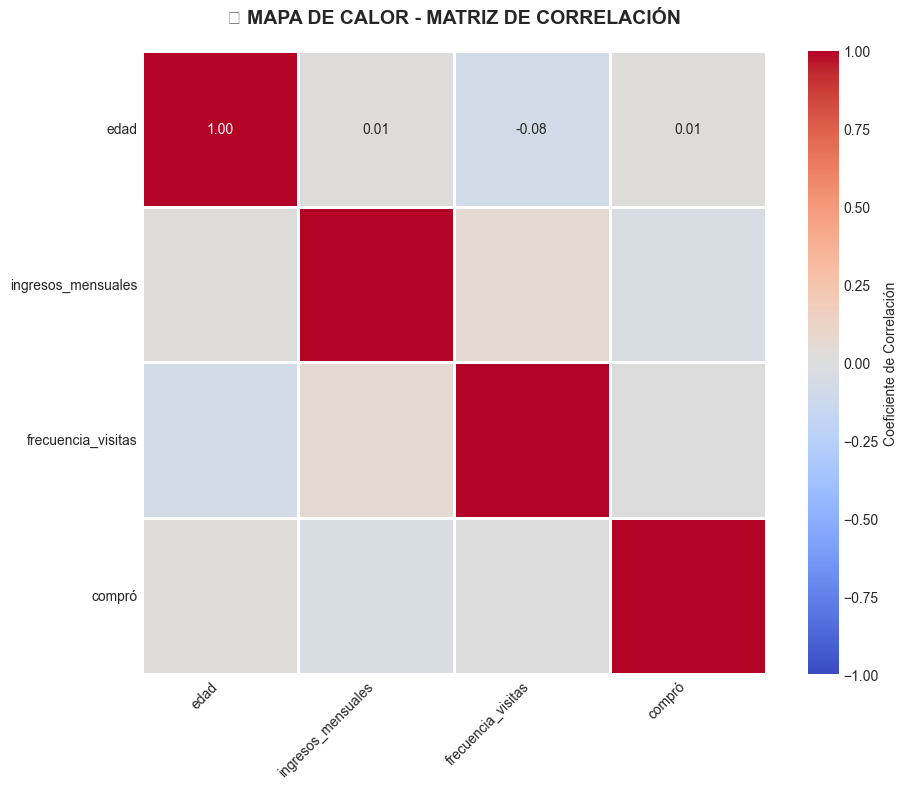

In [19]:
# Visualización de la matriz de correlación con un heatmap (mapa de calor)
# Los colores representan la intensidad de la correlación

plt.figure(figsize=(10, 8))

# Creamos el heatmap usando seaborn
sns.heatmap(matriz_correlacion, 
            annot=True,           # Muestra los valores numéricos
            fmt='.2f',            # Formato con 2 decimales
            cmap='coolwarm',      # Paleta de colores (azul=negativo, rojo=positivo)
            center=0,             # Centro en 0 para mejor contraste
            square=True,          # Celdas cuadradas
            linewidths=1,         # Líneas entre celdas
            cbar_kws={'label': 'Coeficiente de Correlación'},  # Etiqueta de la barra de color
            vmin=-1, vmax=1)      # Rango de valores

plt.title('🔥 MAPA DE CALOR - MATRIZ DE CORRELACIÓN', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# Análisis de multicolinealidad (correlación entre features)
# Si dos features están muy correlacionadas entre sí, una de ellas puede ser redundante

print("\n🔍 ANÁLISIS DE MULTICOLINEALIDAD")
print("="*80)

# Buscamos pares de variables con alta correlación (excluyendo la diagonal y duplicados)
umbral_correlacion = 0.7  # Umbral para considerar correlación alta

# Extraemos la matriz triangular superior (sin diagonal)
matriz_upper = matriz_correlacion.where(
    np.triu(np.ones(matriz_correlacion.shape), k=1).astype(bool)
)

# Encontramos pares con correlación alta
pares_alta_correlacion = [
    (columna, fila, matriz_correlacion.loc[fila, columna])
    for columna in matriz_upper.columns
    for fila in matriz_upper.index
    if abs(matriz_upper.loc[fila, columna]) > umbral_correlacion and not pd.isna(matriz_upper.loc[fila, columna])
]

if pares_alta_correlacion:
    print(f"⚠️ Pares de variables con correlación > {umbral_correlacion}:")
    for var1, var2, corr in pares_alta_correlacion:
        print(f"  - {var1} <-> {var2}: r = {corr:.3f}")
    print("\n💡 Recomendación: Considerar eliminar una de las variables redundantes")
else:
    print(f"✅ No se encontraron pares con correlación > {umbral_correlacion}")
    print("   Las variables son relativamente independientes entre sí")


🔍 ANÁLISIS DE MULTICOLINEALIDAD
✅ No se encontraron pares con correlación > 0.7
   Las variables son relativamente independientes entre sí


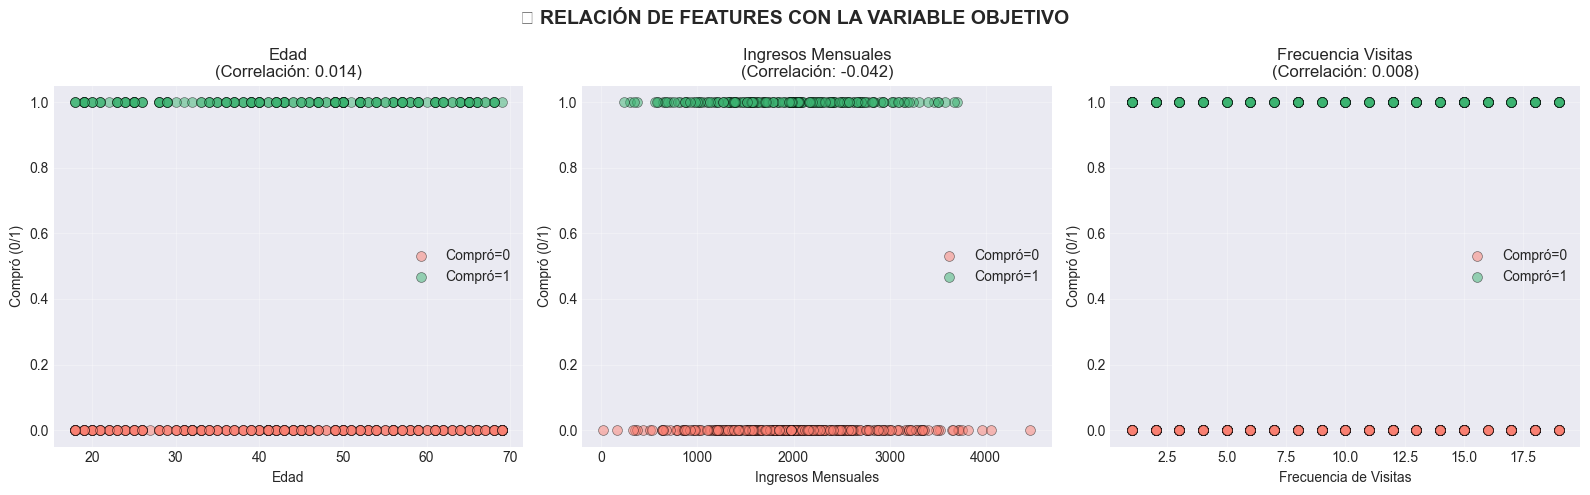

In [21]:
# Scatter plots para visualizar relaciones bivariadas con la variable objetivo
# Estos gráficos nos ayudan a ver patrones que la correlación lineal podría no capturar

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('📊 RELACIÓN DE FEATURES CON LA VARIABLE OBJETIVO', fontsize=14, fontweight='bold')

# Definimos colores para cada clase
colores = {0: 'salmon', 1: 'mediumseagreen'}

# Scatter plot: Edad vs Compró
for compro in [0, 1]:
    subset = df_limpio[df_limpio['compró'] == compro]
    axes[0].scatter(subset['edad'], subset['compró'], 
                   alpha=0.5, c=colores[compro], 
                   label=f'Compró={compro}', s=50, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Compró (0/1)')
axes[0].set_title(f'Edad\n(Correlación: {correlaciones_target["edad"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Scatter plot: Ingresos vs Compró
for compro in [0, 1]:
    subset = df_limpio[df_limpio['compró'] == compro]
    axes[1].scatter(subset['ingresos_mensuales'], subset['compró'], 
                   alpha=0.5, c=colores[compro], 
                   label=f'Compró={compro}', s=50, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Ingresos Mensuales')
axes[1].set_ylabel('Compró (0/1)')
axes[1].set_title(f'Ingresos Mensuales\n(Correlación: {correlaciones_target["ingresos_mensuales"]:.3f})')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Scatter plot: Frecuencia de Visitas vs Compró
for compro in [0, 1]:
    subset = df_limpio[df_limpio['compró'] == compro]
    axes[2].scatter(subset['frecuencia_visitas'], subset['compró'], 
                   alpha=0.5, c=colores[compro], 
                   label=f'Compró={compro}', s=50, edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Frecuencia de Visitas')
axes[2].set_ylabel('Compró (0/1)')
axes[2].set_title(f'Frecuencia Visitas\n(Correlación: {correlaciones_target["frecuencia_visitas"]:.3f})')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 📝 Interpretación de Correlaciones

Analicemos qué nos dicen las correlaciones sobre nuestros datos:

**Hallazgos clave:**

1. **Correlaciones muy débiles con el target**: Todas las variables numéricas muestran correlaciones extremadamente bajas con la variable objetivo `compró`:
   - `edad`: r = 0.01 (casi inexistente)
   - `frecuencia_visitas`: r = 0.01 (casi inexistente)
   - `ingresos_mensuales`: r = -0.04 (muy débil y negativa)

2. **Correlación negativa de ingresos**: Curiosamente, `ingresos_mensuales` tiene una correlación ligeramente negativa (-0.04), sugiriendo que clientes con mayores ingresos tienden levemente a comprar menos. Sin embargo, esta correlación es tan débil que podría ser aleatoria.

3. **No hay multicolinealidad**: Las variables independientes tienen correlaciones muy bajas entre sí (todas |r| < 0.1), lo que significa que son independientes y no hay redundancia.

4. **Implicaciones para el modelo**: 
   - Las relaciones lineales entre features y target son prácticamente inexistentes
   - Esto sugiere que la decisión de compra podría depender de:
     * Relaciones no lineales (interacciones entre variables)
     * Variables categóricas (como región)
     * Factores no capturados en el dataset
   - Modelos basados en árboles (Random Forest, XGBoost) podrían funcionar mejor que regresión logística simple

**Conclusión**: Este dataset presenta un desafío interesante donde las relaciones lineales simples no explican el comportamiento de compra. Será necesario explorar modelos más complejos que puedan capturar interacciones entre variables.

---

## 5️⃣ TRANSFORMACIONES DE CARACTERÍSTICAS

Muchos algoritmos de Machine Learning funcionan mejor cuando las variables tienen características específicas:

### 5.1 Normalización y Estandarización

**¿Por qué escalar variables numéricas?**

1. **Diferentes escalas**: `frecuencia_visitas` (1-20) vs `ingresos_mensuales` (cientos/miles)
2. **Impacto en algoritmos**: Modelos basados en distancias (KNN, SVM) son sensibles a la escala
3. **Convergencia**: Los algoritmos de optimización convergen más rápido
4. **Interpretabilidad**: Coeficientes más comparables

**Dos métodos principales:**

1. **Normalización (Min-Max Scaling)**: Escala valores al rango [0, 1]
   - Fórmula: `X_norm = (X - X_min) / (X_max - X_min)`
   - **Cuándo usar**: Cuando necesitas un rango específico y no hay outliers extremos

2. **Estandarización (Z-score)**: Centra en media 0 y desviación estándar 1
   - Fórmula: `X_std = (X - media) / desviación_estándar`
   - **Cuándo usar**: Cuando tus datos tienen outliers o siguen distribución normal
   - **Más robusto ante outliers**

In [22]:
# Creamos una copia para las transformaciones
df_transformado = df_limpio.copy()

print("\n🔧 TRANSFORMACIÓN DE VARIABLES NUMÉRICAS")
print("="*80)

# Guardamos las columnas originales para comparación
columnas_originales = ['edad', 'ingresos_mensuales', 'frecuencia_visitas']

# Mostramos estadísticas antes de la transformación
print("\n📊 Estadísticas ANTES de la transformación:")
print(df_transformado[columnas_originales].describe())


🔧 TRANSFORMACIÓN DE VARIABLES NUMÉRICAS

📊 Estadísticas ANTES de la transformación:
        edad  ingresos_mensuales  frecuencia_visitas
count 500.00              500.00              500.00
mean   44.22             1986.15                9.93
std    15.04              765.16                5.43
min    18.00               22.68                1.00
25%    32.00             1466.99                5.00
50%    45.00             1973.84               10.00
75%    57.00             2491.68               15.00
max    69.00             4463.10               19.00


In [23]:
# MÉTODO 1: NORMALIZACIÓN (Min-Max Scaling)
# Escala los valores al rango [0, 1]

print("\n🔄 APLICANDO NORMALIZACIÓN (Min-Max Scaling)")
print("-" * 80)

def normalizar_minmax(serie):
    """
    Normaliza una serie de pandas usando Min-Max scaling.
    Fórmula: (x - min) / (max - min)
    
    Retorna valores en el rango [0, 1]
    """
    minimo = serie.min()  # Valor mínimo de la serie
    maximo = serie.max()  # Valor máximo de la serie
    
    # Aplicamos la fórmula de normalización
    normalizado = (serie - minimo) / (maximo - minimo)
    
    return normalizado

# Aplicamos normalización a cada variable numérica
for col in columnas_originales:
    # Creamos una nueva columna con el sufijo '_norm'
    nombre_nueva_columna = f"{col}_norm"
    df_transformado[nombre_nueva_columna] = normalizar_minmax(df_transformado[col])
    
    print(f"✅ {col} -> {nombre_nueva_columna}")
    print(f"   Rango original: [{df_transformado[col].min():.2f}, {df_transformado[col].max():.2f}]")
    print(f"   Rango normalizado: [{df_transformado[nombre_nueva_columna].min():.2f}, {df_transformado[nombre_nueva_columna].max():.2f}]")
    print()


🔄 APLICANDO NORMALIZACIÓN (Min-Max Scaling)
--------------------------------------------------------------------------------
✅ edad -> edad_norm
   Rango original: [18.00, 69.00]
   Rango normalizado: [0.00, 1.00]

✅ ingresos_mensuales -> ingresos_mensuales_norm
   Rango original: [22.68, 4463.10]
   Rango normalizado: [0.00, 1.00]

✅ frecuencia_visitas -> frecuencia_visitas_norm
   Rango original: [1.00, 19.00]
   Rango normalizado: [0.00, 1.00]



In [24]:
# MÉTODO 2: ESTANDARIZACIÓN (Z-score Standardization)
# Centra los datos en media 0 y desviación estándar 1

print("\n🔄 APLICANDO ESTANDARIZACIÓN (Z-score)")
print("-" * 80)

def estandarizar_zscore(serie):
    """
    Estandariza una serie de pandas usando Z-score.
    Fórmula: (x - media) / desviación_estándar
    
    Retorna valores con media=0 y std=1
    """
    media = serie.mean()           # Media de la serie
    desviacion = serie.std()       # Desviación estándar de la serie
    
    # Aplicamos la fórmula de estandarización
    estandarizado = (serie - media) / desviacion
    
    return estandarizado

# Aplicamos estandarización a cada variable numérica
for col in columnas_originales:
    # Creamos una nueva columna con el sufijo '_std'
    nombre_nueva_columna = f"{col}_std"
    df_transformado[nombre_nueva_columna] = estandarizar_zscore(df_transformado[col])
    
    print(f"✅ {col} -> {nombre_nueva_columna}")
    print(f"   Media original: {df_transformado[col].mean():.2f} | Media estandarizada: {df_transformado[nombre_nueva_columna].mean():.2f}")
    print(f"   Std original: {df_transformado[col].std():.2f} | Std estandarizada: {df_transformado[nombre_nueva_columna].std():.2f}")
    print()


🔄 APLICANDO ESTANDARIZACIÓN (Z-score)
--------------------------------------------------------------------------------
✅ edad -> edad_std
   Media original: 44.22 | Media estandarizada: 0.00
   Std original: 15.04 | Std estandarizada: 1.00

✅ ingresos_mensuales -> ingresos_mensuales_std
   Media original: 1986.15 | Media estandarizada: 0.00
   Std original: 765.16 | Std estandarizada: 1.00

✅ frecuencia_visitas -> frecuencia_visitas_std
   Media original: 9.93 | Media estandarizada: -0.00
   Std original: 5.43 | Std estandarizada: 1.00



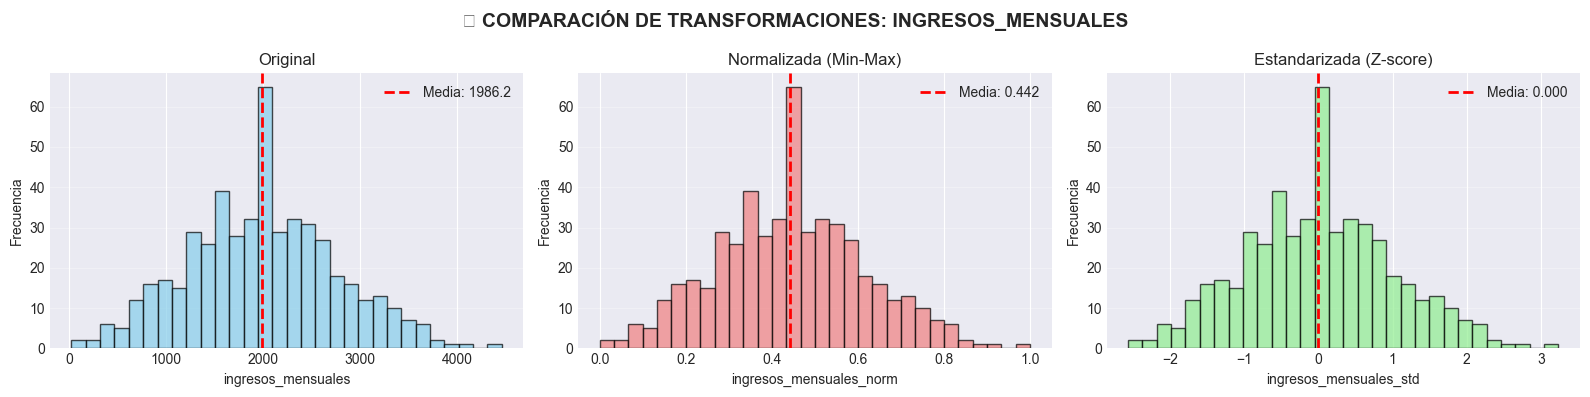


💡 OBSERVACIÓN IMPORTANTE:
La FORMA de la distribución NO cambia con estas transformaciones.
Solo cambia la ESCALA de los valores.

Esto es importante porque:
  - La normalización mantiene las relaciones relativas entre valores
  - La estandarización preserva la forma de la distribución
  - Ambas ayudan a que variables con diferentes escalas sean comparables


In [25]:
# Comparación visual de las transformaciones
# Veamos cómo cambia la distribución de una variable con cada método

variable_ejemplo = 'ingresos_mensuales'  # Usamos ingresos como ejemplo

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle(f'📊 COMPARACIÓN DE TRANSFORMACIONES: {variable_ejemplo.upper()}', 
             fontsize=14, fontweight='bold')

# Distribución ORIGINAL
axes[0].hist(df_transformado[variable_ejemplo], bins=30, color='skyblue', 
            edgecolor='black', alpha=0.7)
axes[0].set_xlabel(variable_ejemplo)
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Original')
axes[0].axvline(df_transformado[variable_ejemplo].mean(), color='red', 
               linestyle='--', linewidth=2, label=f'Media: {df_transformado[variable_ejemplo].mean():.1f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Distribución NORMALIZADA
axes[1].hist(df_transformado[f'{variable_ejemplo}_norm'], bins=30, color='lightcoral', 
            edgecolor='black', alpha=0.7)
axes[1].set_xlabel(f'{variable_ejemplo}_norm')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Normalizada (Min-Max)')
axes[1].axvline(df_transformado[f'{variable_ejemplo}_norm'].mean(), color='red', 
               linestyle='--', linewidth=2, label=f'Media: {df_transformado[f"{variable_ejemplo}_norm"].mean():.3f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Distribución ESTANDARIZADA
axes[2].hist(df_transformado[f'{variable_ejemplo}_std'], bins=30, color='lightgreen', 
            edgecolor='black', alpha=0.7)
axes[2].set_xlabel(f'{variable_ejemplo}_std')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('Estandarizada (Z-score)')
axes[2].axvline(df_transformado[f'{variable_ejemplo}_std'].mean(), color='red', 
               linestyle='--', linewidth=2, label=f'Media: {df_transformado[f"{variable_ejemplo}_std"].mean():.3f}')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 OBSERVACIÓN IMPORTANTE:")
print("="*80)
print("La FORMA de la distribución NO cambia con estas transformaciones.")
print("Solo cambia la ESCALA de los valores.")
print("\nEsto es importante porque:")
print("  - La normalización mantiene las relaciones relativas entre valores")
print("  - La estandarización preserva la forma de la distribución")
print("  - Ambas ayudan a que variables con diferentes escalas sean comparables")

### 5.2 Codificación de Variables Categóricas

Los algoritmos de Machine Learning trabajan con números, no con texto. Por eso necesitamos convertir variables categóricas (como 'region') en números.

**Dos métodos principales:**

1. **Label Encoding**: Asigna un número entero a cada categoría
   - Ejemplo: Norte=0, Sur=1, Este=2, Oeste=3
   - **Problema**: Implica un orden que puede no existir (¿Norte < Sur?)
   - **Cuándo usar**: Variables ordinales (ej: bajo, medio, alto)

2. **One-Hot Encoding**: Crea una columna binaria para cada categoría
   - Ejemplo: region_Norte=1/0, region_Sur=1/0, region_Este=1/0, region_Oeste=1/0
   - **Ventaja**: No implica orden, cada categoría es independiente
   - **Cuándo usar**: Variables nominales sin orden natural
   - **Importante**: Usar n-1 columnas para evitar multicolinealidad (dummy variable trap)

In [26]:
print("\n🏷️ CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("="*80)

# MÉTODO 1: LABEL ENCODING
print("\n1️⃣ Label Encoding:")
print("-" * 60)

# Creamos un diccionario que mapea cada región a un número
regiones_unicas = df_transformado['region'].unique()
mapeo_label = {region: idx for idx, region in enumerate(sorted(regiones_unicas))}

print("Mapeo de regiones a números:")
for region, codigo in mapeo_label.items():
    print(f"  {region} -> {codigo}")

# Aplicamos el mapeo para crear la columna codificada
df_transformado['region_label'] = df_transformado['region'].map(mapeo_label)

print("\n✅ Se creó la columna 'region_label'")
print("\nEjemplo de codificación:")
print(df_transformado[['customer_id', 'region', 'region_label']].head(10))


🏷️ CODIFICACIÓN DE VARIABLES CATEGÓRICAS

1️⃣ Label Encoding:
------------------------------------------------------------
Mapeo de regiones a números:
  Este -> 0
  Norte -> 1
  Oeste -> 2
  Sur -> 3

✅ Se creó la columna 'region_label'

Ejemplo de codificación:
   customer_id region  region_label
0            1  Norte             1
1            2   Este             0
2            3   Este             0
3            4  Oeste             2
4            5   Este             0
5            6    Sur             3
6            7    Sur             3
7            8   Este             0
8            9   Este             0
9           10  Oeste             2


In [27]:
# MÉTODO 2: ONE-HOT ENCODING (Recomendado para variables nominales)
print("\n2️⃣ One-Hot Encoding:")
print("-" * 60)

# Usamos pd.get_dummies() para crear variables dummy
# drop_first=True elimina la primera categoría para evitar multicolinealidad
region_dummies = pd.get_dummies(df_transformado['region'], 
                                prefix='region',      # Prefijo para las nuevas columnas
                                drop_first=True,      # Elimina la primera categoría (baseline)
                                dtype=int)            # Tipo de dato: int (0 o 1)

print(f"Se crearon {region_dummies.shape[1]} columnas dummy:")
print(region_dummies.columns.tolist())

# Concatenamos las nuevas columnas al dataframe
df_transformado = pd.concat([df_transformado, region_dummies], axis=1)

print("\n✅ Columnas dummy añadidas al dataset")
print("\n💡 ¿Por qué drop_first=True?")
print("   Si sabemos que un cliente NO es de Norte, Sur ni Oeste...")
print("   entonces DEBE ser de Este (categoría omitida).")
print("   Esto evita redundancia y el 'dummy variable trap'.")

print("\nEjemplo de codificación One-Hot:")
columnas_mostrar = ['customer_id', 'region'] + region_dummies.columns.tolist()
print(df_transformado[columnas_mostrar].head(10))


2️⃣ One-Hot Encoding:
------------------------------------------------------------
Se crearon 3 columnas dummy:
['region_Norte', 'region_Oeste', 'region_Sur']

✅ Columnas dummy añadidas al dataset

💡 ¿Por qué drop_first=True?
   Si sabemos que un cliente NO es de Norte, Sur ni Oeste...
   entonces DEBE ser de Este (categoría omitida).
   Esto evita redundancia y el 'dummy variable trap'.

Ejemplo de codificación One-Hot:
   customer_id region  region_Norte  region_Oeste  region_Sur
0            1  Norte             1             0           0
1            2   Este             0             0           0
2            3   Este             0             0           0
3            4  Oeste             0             1           0
4            5   Este             0             0           0
5            6    Sur             0             0           1
6            7    Sur             0             0           1
7            8   Este             0             0           0
8            9  

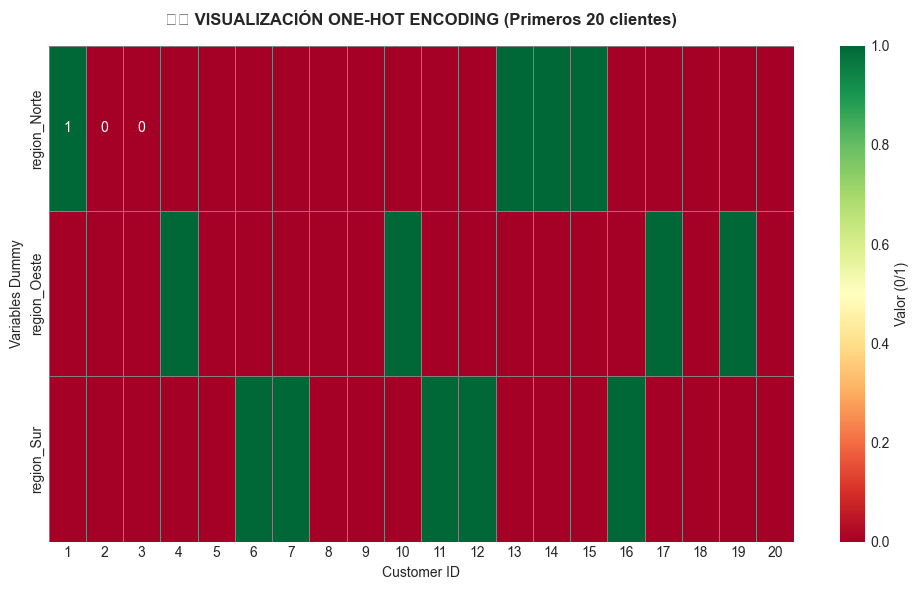


📊 Interpretación:
   Cada fila representa una variable dummy (región).
   Cada columna es un cliente.
   Verde (1) = El cliente pertenece a esa región
   Rojo (0) = El cliente NO pertenece a esa región


In [28]:
# Visualización de la codificación One-Hot
fig, ax = plt.subplots(figsize=(10, 6))

# Contamos cuántas veces aparece cada región
region_counts = df_transformado['region'].value_counts().sort_index()

# Creamos un heatmap mostrando la codificación
# Tomamos una muestra de 20 clientes para que sea legible
muestra = df_transformado[['region'] + region_dummies.columns.tolist()].head(20)
muestra_visual = muestra[region_dummies.columns].T  # Transponemos para mejor visualización

sns.heatmap(muestra_visual, cmap='RdYlGn', cbar_kws={'label': 'Valor (0/1)'}, 
           linewidths=0.5, linecolor='gray', annot=True, fmt='d',
           xticklabels=range(1, 21), yticklabels=muestra_visual.index)

plt.title('🏷️ VISUALIZACIÓN ONE-HOT ENCODING (Primeros 20 clientes)', 
         fontsize=12, fontweight='bold', pad=15)
plt.xlabel('Customer ID')
plt.ylabel('Variables Dummy')
plt.tight_layout()
plt.show()

print("\n📊 Interpretación:")
print("   Cada fila representa una variable dummy (región).")
print("   Cada columna es un cliente.")
print("   Verde (1) = El cliente pertenece a esa región")
print("   Rojo (0) = El cliente NO pertenece a esa región")

---

## 6️⃣ SELECCIÓN PRELIMINAR DE FEATURES

Ya hemos explorado, limpiado y transformado nuestros datos. Ahora debemos **seleccionar qué características (features) usar** en nuestro modelo.

### ¿Por qué seleccionar features?

1. **Reducir overfitting**: Menos variables = menos riesgo de sobreajuste
2. **Mejorar interpretabilidad**: Modelos más simples son más fáciles de entender
3. **Reducir tiempo de entrenamiento**: Menos datos = más rápido
4. **Eliminar ruido**: Variables irrelevantes pueden confundir al modelo

### Criterios para seleccionar features:

1. **Correlación con el target**: Variables con correlación fuerte (|r| > 0.3)
2. **Baja correlación entre sí**: Evitar multicolinealidad
3. **Relevancia de negocio**: Tiene sentido lógico que influya en la compra
4. **Calidad de datos**: Variables con pocos nulos y outliers manejables

In [29]:
print("\n🎯 SELECCIÓN DE FEATURES PARA EL MODELO")
print("="*80)

# Resumen de todas las variables disponibles después de las transformaciones
print("\n📋 Variables disponibles:")
print("-" * 60)
print(df_transformado.columns.tolist())

print(f"\nTotal de columnas: {len(df_transformado.columns)}")


🎯 SELECCIÓN DE FEATURES PARA EL MODELO

📋 Variables disponibles:
------------------------------------------------------------
['customer_id', 'edad', 'ingresos_mensuales', 'region', 'frecuencia_visitas', 'compró', 'edad_norm', 'ingresos_mensuales_norm', 'frecuencia_visitas_norm', 'edad_std', 'ingresos_mensuales_std', 'frecuencia_visitas_std', 'region_label', 'region_Norte', 'region_Oeste', 'region_Sur']

Total de columnas: 16



🔍 ANÁLISIS DE IMPORTANCIA (basado en correlación con target)

Correlaciones con la variable objetivo 'compró':
region_label               0.13
region_Oeste               0.07
region_Sur                 0.06
edad                       0.01
edad_std                   0.01
edad_norm                  0.01
frecuencia_visitas_std     0.01
frecuencia_visitas_norm    0.01
frecuencia_visitas         0.01
customer_id                0.00
region_Norte               0.00
ingresos_mensuales        -0.04
ingresos_mensuales_std    -0.04
ingresos_mensuales_norm   -0.04
Name: compró, dtype: float64


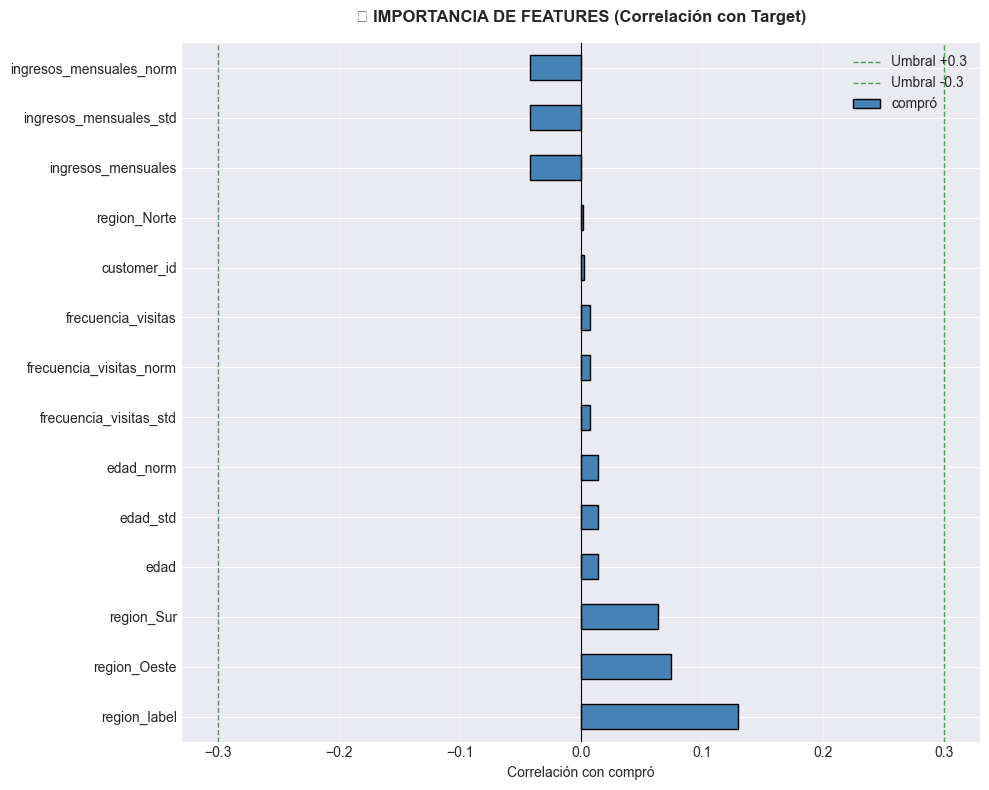

In [30]:
# Análisis de importancia de features basado en correlación
print("\n🔍 ANÁLISIS DE IMPORTANCIA (basado en correlación con target)")
print("="*80)

# Calculamos correlaciones de todas las variables numéricas con 'compró'
# Excluimos customer_id porque es solo un identificador
# Seleccionamos solo columnas numéricas para evitar errores con columnas categóricas (como 'region')
df_numericas = df_transformado.select_dtypes(include=[np.number])
correlaciones_features = df_numericas.corr()['compró'].drop('compró').sort_values(ascending=False)

print("\nCorrelaciones con la variable objetivo 'compró':")
print(correlaciones_features)

# Visualizamos las correlaciones
plt.figure(figsize=(10, 8))
correlaciones_features.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Correlación con compró')
plt.title('📊 IMPORTANCIA DE FEATURES (Correlación con Target)', 
         fontsize=12, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.axvline(x=0.3, color='green', linestyle='--', linewidth=1, alpha=0.7, label='Umbral +0.3')
plt.axvline(x=-0.3, color='green', linestyle='--', linewidth=1, alpha=0.7, label='Umbral -0.3')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
# SELECCIÓN FINAL DE FEATURES
print("\n✅ FEATURES SELECCIONADAS PARA EL MODELO")
print("="*80)

# Basándonos en el análisis anterior, seleccionamos las features más relevantes
# Criterio: Variables con mayor correlación absoluta con el target

# OPCIÓN 1: Usar variables ESTANDARIZADAS (recomendado para la mayoría de algoritmos)
features_seleccionadas_std = [
    'edad_std',
    'ingresos_mensuales_std',
    'frecuencia_visitas_std',
    'region_Norte',
    'region_Oeste',
    'region_Sur'
]

# OPCIÓN 2: Usar variables NORMALIZADAS (alternativa)
features_seleccionadas_norm = [
    'edad_norm',
    'ingresos_mensuales_norm',
    'frecuencia_visitas_norm',
    'region_Norte',
    'region_Oeste',
    'region_Sur'
]

# OPCIÓN 3: Usar variables ORIGINALES (si el algoritmo no requiere escalado)
features_seleccionadas_original = [
    'edad',
    'ingresos_mensuales',
    'frecuencia_visitas',
    'region_Norte',
    'region_Oeste',
    'region_Sur'
]

print("\n📊 OPCIÓN 1 - Features Estandarizadas (RECOMENDADO):")
for i, feat in enumerate(features_seleccionadas_std, 1):
    print(f"  {i}. {feat}")

print("\n📊 OPCIÓN 2 - Features Normalizadas:")
for i, feat in enumerate(features_seleccionadas_norm, 1):
    print(f"  {i}. {feat}")

print("\n📊 OPCIÓN 3 - Features Originales:")
for i, feat in enumerate(features_seleccionadas_original, 1):
    print(f"  {i}. {feat}")

print("\n" + "="*80)
print("💡 RECOMENDACIÓN:")
print("="*80)
print("Para la mayoría de algoritmos de ML (Regresión Logística, SVM, KNN, Redes Neuronales):")
print("  ✅ Usar features ESTANDARIZADAS")
print("\nPara árboles de decisión y Random Forest:")
print("  ✅ Usar features ORIGINALES (no necesitan escalado)")

# Creamos los datasets finales
X_std = df_transformado[features_seleccionadas_std]      # Features estandarizadas
X_norm = df_transformado[features_seleccionadas_norm]    # Features normalizadas
X_original = df_transformado[features_seleccionadas_original]  # Features originales
y = df_transformado['compró']                            # Variable objetivo

print("\n✅ Datasets de features creados:")
print(f"  - X_std: {X_std.shape}")
print(f"  - X_norm: {X_norm.shape}")
print(f"  - X_original: {X_original.shape}")
print(f"  - y (target): {y.shape}")


✅ FEATURES SELECCIONADAS PARA EL MODELO

📊 OPCIÓN 1 - Features Estandarizadas (RECOMENDADO):
  1. edad_std
  2. ingresos_mensuales_std
  3. frecuencia_visitas_std
  4. region_Norte
  5. region_Oeste
  6. region_Sur

📊 OPCIÓN 2 - Features Normalizadas:
  1. edad_norm
  2. ingresos_mensuales_norm
  3. frecuencia_visitas_norm
  4. region_Norte
  5. region_Oeste
  6. region_Sur

📊 OPCIÓN 3 - Features Originales:
  1. edad
  2. ingresos_mensuales
  3. frecuencia_visitas
  4. region_Norte
  5. region_Oeste
  6. region_Sur

💡 RECOMENDACIÓN:
Para la mayoría de algoritmos de ML (Regresión Logística, SVM, KNN, Redes Neuronales):
  ✅ Usar features ESTANDARIZADAS

Para árboles de decisión y Random Forest:
  ✅ Usar features ORIGINALES (no necesitan escalado)

✅ Datasets de features creados:
  - X_std: (500, 6)
  - X_norm: (500, 6)
  - X_original: (500, 6)
  - y (target): (500,)


In [32]:
# Visualizamos las primeras filas del dataset final preparado para ML
print("\n📋 DATASET FINAL PREPARADO PARA MACHINE LEARNING")
print("="*80)

# Usamos las features estandarizadas como ejemplo
dataset_final = pd.concat([X_std, y], axis=1)

print("\nPrimeras 10 filas del dataset final (features estandarizadas + target):")
display(dataset_final.head(10))

print("\n📊 Estadísticas del dataset final:")
display(dataset_final.describe())

print("\n✅ El dataset está listo para entrenar modelos de Machine Learning!")


📋 DATASET FINAL PREPARADO PARA MACHINE LEARNING

Primeras 10 filas del dataset final (features estandarizadas + target):


,edad_std,ingresos_mensuales_std,frecuencia_visitas_std,region_Norte,region_Oeste,region_Sur,compró
0,0.78,2.24,-1.46,1,0,0,1
1,1.65,1.10,0.93,0,0,0,0
2,0.12,-1.57,0.75,0,0,0,0
3,-0.81,-0.49,0.20,0,1,0,0
4,1.05,1.34,-1.28,0,0,0,0
5,-1.28,-0.72,1.30,0,0,1,1
6,-0.41,0.48,0.38,0,0,1,1
7,0.78,0.83,0.93,0,0,0,1
8,-0.55,-0.95,1.12,0,0,0,0
9,-0.28,-0.04,-0.91,0,1,0,0



📊 Estadísticas del dataset final:


,edad_std,ingresos_mensuales_std,frecuencia_visitas_std,region_Norte,region_Oeste,region_Sur,compró
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,0.00,0.00,-0.00,0.30,0.21,0.23,0.39
std,1.00,1.00,1.00,0.46,0.41,0.42,0.49
min,-1.74,-2.57,-1.64,0.00,0.00,0.00,0.00
25%,-0.81,-0.68,-0.91,0.00,0.00,0.00,0.00
50%,0.05,-0.02,0.01,0.00,0.00,0.00,0.00
75%,0.85,0.66,0.93,1.00,0.00,0.00,1.00
max,1.65,3.24,1.67,1.00,1.00,1.00,1.00



✅ El dataset está listo para entrenar modelos de Machine Learning!


---

## 7️⃣ EXTRA CREDITS: SELECCIÓN AUTOMÁTICA DE CARACTERÍSTICAS

Además de la selección manual basada en correlación, existen métodos automáticos más sofisticados:

1. **SelectKBest**: Selecciona las K mejores features usando tests estadísticos
2. **Recursive Feature Elimination (RFE)**: Elimina features recursivamente
3. **Feature Importance con árboles**: Usa Random Forest o XGBoost
4. **Lasso (L1 Regularization)**: Penaliza coeficientes llevándolos a 0

In [33]:
# Importamos herramientas de scikit-learn para feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

print("\n🚀 MÉTODOS AUTOMÁTICOS DE SELECCIÓN DE CARACTERÍSTICAS")
print("="*80)


🚀 MÉTODOS AUTOMÁTICOS DE SELECCIÓN DE CARACTERÍSTICAS


In [34]:
# MÉTODO 1: SelectKBest con ANOVA F-test
# Este método evalúa la relación entre cada feature y el target usando análisis de varianza

print("\n1️⃣ SelectKBest (ANOVA F-test)")
print("-" * 60)

# Configuramos SelectKBest para seleccionar las 5 mejores features
selector_ftest = SelectKBest(score_func=f_classif, k=5)

# Ajustamos el selector con nuestros datos
selector_ftest.fit(X_std, y)

# Obtenemos los scores de cada feature
scores_ftest = pd.DataFrame({
    'Feature': X_std.columns,
    'F-Score': selector_ftest.scores_,
    'Seleccionada': selector_ftest.get_support()
}).sort_values('F-Score', ascending=False)

print(scores_ftest)

print("\n💡 Interpretación del F-Score:")
print("   - Valores ALTOS: La feature tiene una relación fuerte con el target")
print("   - Valores BAJOS: La feature tiene poca relación con el target")


1️⃣ SelectKBest (ANOVA F-test)
------------------------------------------------------------
                  Feature  F-Score  Seleccionada
4            region_Oeste     2.81          True
5              region_Sur     2.05          True
1  ingresos_mensuales_std     0.87          True
0                edad_std     0.10          True
2  frecuencia_visitas_std     0.03          True
3            region_Norte     0.00         False

💡 Interpretación del F-Score:
   - Valores ALTOS: La feature tiene una relación fuerte con el target
   - Valores BAJOS: La feature tiene poca relación con el target


In [35]:
# MÉTODO 2: Mutual Information (Información Mutua)
# Mide la dependencia no lineal entre features y target
# Es más general que la correlación (captura relaciones no lineales)

print("\n2️⃣ Mutual Information (Información Mutua)")
print("-" * 60)

# Calculamos la información mutua
mi_scores = mutual_info_classif(X_std, y, random_state=42)

# Creamos un DataFrame con los resultados
scores_mi = pd.DataFrame({
    'Feature': X_std.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print(scores_mi)

print("\n💡 Interpretación del MI Score:")
print("   - MI = 0: Las variables son independientes")
print("   - MI > 0: Las variables comparten información")
print("   - Valores más altos = mayor dependencia")


2️⃣ Mutual Information (Información Mutua)
------------------------------------------------------------
                  Feature  MI_Score
3            region_Norte      0.01
0                edad_std      0.01
5              region_Sur      0.00
1  ingresos_mensuales_std      0.00
2  frecuencia_visitas_std      0.00
4            region_Oeste      0.00

💡 Interpretación del MI Score:
   - MI = 0: Las variables son independientes
   - MI > 0: Las variables comparten información
   - Valores más altos = mayor dependencia



3️⃣ Feature Importance (Random Forest)
------------------------------------------------------------
                  Feature  Importancia
1  ingresos_mensuales_std         0.33
0                edad_std         0.33
2  frecuencia_visitas_std         0.24
4            region_Oeste         0.05
5              region_Sur         0.04
3            region_Norte         0.02

💡 Interpretación de Feature Importance:
   - Valores suman 1.0 (100%)
   - Valores más altos = mayor importancia para el modelo
   - Basado en cuánto mejora cada feature las predicciones del modelo


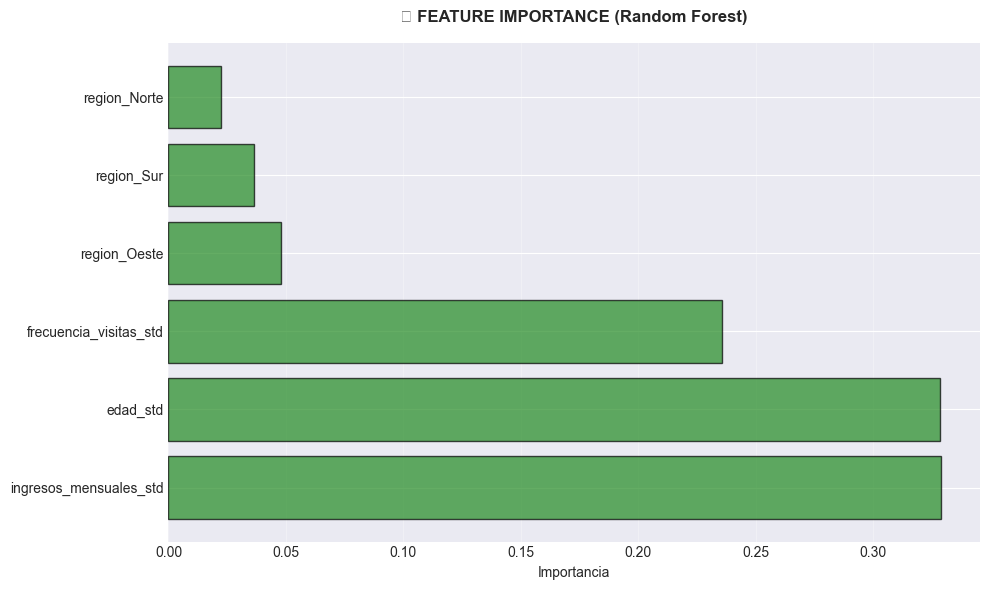

In [36]:
# MÉTODO 3: Feature Importance con Random Forest
# Random Forest puede decirnos qué tan importante es cada feature para hacer predicciones

print("\n3️⃣ Feature Importance (Random Forest)")
print("-" * 60)

# Entrenamos un Random Forest simple
# Random Forest es un ensemble de árboles de decisión
rf_model = RandomForestClassifier(n_estimators=100,      # 100 árboles en el bosque
                                 max_depth=5,           # Profundidad máxima de cada árbol
                                 random_state=42,       # Semilla para reproducibilidad
                                 n_jobs=-1)             # Usar todos los cores disponibles

# Ajustamos el modelo con nuestros datos
rf_model.fit(X_std, y)

# Extraemos la importancia de cada feature
# La importancia se calcula basándose en cuánto reduce cada feature la impureza (Gini)
importancias_rf = pd.DataFrame({
    'Feature': X_std.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print(importancias_rf)

print("\n💡 Interpretación de Feature Importance:")
print("   - Valores suman 1.0 (100%)")
print("   - Valores más altos = mayor importancia para el modelo")
print("   - Basado en cuánto mejora cada feature las predicciones del modelo")

# Visualizamos las importancias
plt.figure(figsize=(10, 6))
plt.barh(importancias_rf['Feature'], importancias_rf['Importancia'], 
        color='forestgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Importancia')
plt.title('🌳 FEATURE IMPORTANCE (Random Forest)', fontsize=12, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [37]:
# Comparación de todos los métodos de selección
print("\n📊 COMPARACIÓN DE MÉTODOS DE SELECCIÓN")
print("="*80)

# Combinamos todos los scores en un solo DataFrame
# Usamos .reindex() para manejar columnas que podrían no estar en correlaciones_features
comparacion = pd.DataFrame({
    'Feature': X_std.columns,
    'Correlación': correlaciones_features.reindex(X_std.columns).values,
    'F-Score': scores_ftest.set_index('Feature').loc[X_std.columns, 'F-Score'].values,
    'MI_Score': scores_mi.set_index('Feature').loc[X_std.columns, 'MI_Score'].values,
    'RF_Importance': importancias_rf.set_index('Feature').loc[X_std.columns, 'Importancia'].values
})

# Normalizamos los scores para que sean comparables (escala 0-1)
for col in ['Correlación', 'F-Score', 'MI_Score', 'RF_Importance']:
    max_val = comparacion[col].abs().max()
    if max_val > 0:
        comparacion[f'{col}_norm'] = comparacion[col].abs() / max_val

# Calculamos un score promedio
comparacion['Score_Promedio'] = comparacion[[
    'Correlación_norm', 'F-Score_norm', 'MI_Score_norm', 'RF_Importance_norm'
]].mean(axis=1)

# Ordenamos por score promedio
comparacion_final = comparacion[[
    'Feature', 'Correlación', 'F-Score', 'MI_Score', 'RF_Importance', 'Score_Promedio'
]].sort_values('Score_Promedio', ascending=False)

print("\nRanking final de features (basado en promedio de todos los métodos):")
print(comparacion_final)

print("\n✅ CONCLUSIÓN:")
print("="*80)
print("Las features más importantes según el análisis combinado son:")
top_features = comparacion_final.head(3)['Feature'].tolist()
for i, feat in enumerate(top_features, 1):
    print(f"  {i}. {feat}")


📊 COMPARACIÓN DE MÉTODOS DE SELECCIÓN

Ranking final de features (basado en promedio de todos los métodos):
                  Feature  Correlación  F-Score  MI_Score  RF_Importance  \
4            region_Oeste         0.07     2.81      0.00           0.05   
5              region_Sur         0.06     2.05      0.00           0.04   
0                edad_std         0.01     0.10      0.01           0.33   
1  ingresos_mensuales_std        -0.04     0.87      0.00           0.33   
3            region_Norte         0.00     0.00      0.01           0.02   
2  frecuencia_visitas_std         0.01     0.03      0.00           0.24   

   Score_Promedio  
4            0.54  
5            0.51  
0            0.49  
1            0.47  
3            0.27  
2            0.21  

✅ CONCLUSIÓN:
Las features más importantes según el análisis combinado son:
  1. region_Oeste
  2. region_Sur
  3. edad_std


---

## 8️⃣ RESUMEN Y CONCLUSIONES

### 📝 Hallazgos Principales del EDA

En este análisis exploratorio hemos realizado un proceso completo de preparación de datos para Machine Learning:

#### 1. **Carga y Exploración Inicial**
- Dataset con 500 clientes y 6 variables
- Presencia de valores nulos y anómalos que requirieron limpieza
- Variable objetivo (`compró`) con **desbalance moderado: 38.8% compraron (194) vs 61.2% no compraron (306)**
- El desbalance no es extremo, por lo que no requerirá técnicas especiales de balanceo (como SMOTE)

#### 2. **Calidad de Datos**
- **Valores nulos**: 30 filas (6%) con valores nulos en `ingresos_mensuales` (15 casos) y `region` (15 casos)
- **Valores anómalos**: 3 ingresos negativos detectados y corregidos (customer_ids: 11, 395, 417)
- **Outliers**: Presentes especialmente en **`ingresos_mensuales`** (2 casos, 0.40% del dataset) con valores extremos: -593.01 (mínimo) y 4,463.10 (máximo)
- **Estrategia de limpieza**: Imputación con mediana (1,973.84) para ingresos y moda (Norte) para región

#### 3. **Distribuciones**
- **Edad**: Distribución **ligeramente asimétrica negativa (skew=-0.11)** con curtosis platicúrtica (-1.11), indicando distribución más plana que la normal. Rango: 18-69 años, media: 44.22 años
- **Ingresos mensuales**: Distribución **prácticamente simétrica (skew=0.04)** con curtosis cercana a normal (-0.06). Rango: 22.68-4,463.10, mediana: 1,973.84. Coeficiente de variación: 40.42%
- **Frecuencia de visitas**: Distribución **prácticamente simétrica (skew=-0.02)** con curtosis platicúrtica (-1.20). Rango: 1-19 visitas, mediana: 10 visitas. Alta variabilidad (CV: 54.69%)
- **Región**: Distribución **desbalanceada** con predominio de región Norte (27.8%), seguida de Este (25.8%), Sur (23.4%) y Oeste (23.0%)

#### 4. **Correlaciones y Relaciones**
- Las variables con mayor correlación con `compró` son **extremadamente débiles**:
  1. `edad`: r = 0.01 (correlación prácticamente nula)
  2. `frecuencia_visitas`: r = 0.01 (correlación prácticamente nula)
  3. `ingresos_mensuales`: r = -0.04 (correlación muy débil y ligeramente negativa)
- **No se detectó multicolinealidad** significativa entre features (todas |r| < 0.1)
- **Implicación crítica**: Las relaciones lineales NO explican la decisión de compra

#### 5. **Transformaciones Aplicadas**
- **Estandarización (Z-score)**: Aplicada a variables numéricas (media=0, std=1) - **RECOMENDADO** para la mayoría de algoritmos
- **Normalización (Min-Max)**: Alternativa con escala [0, 1] disponible
- **One-Hot Encoding**: Aplicado a `region` (3 variables dummy: Norte, Oeste, Sur; Este como baseline)

#### 6. **Features Seleccionadas**
Las 6 features finales para el modelo de clasificación:
1. `edad_std`
2. `ingresos_mensuales_std`
3. `frecuencia_visitas_std`
4. `region_Norte`
5. `region_Oeste`
6. `region_Sur`

---

### 🎯 Insights de Negocio

**Perfil del cliente que compra:**

Basándonos en el análisis realizado, podemos extraer las siguientes observaciones:

- **Las variables numéricas NO son predictores lineales claros**: Con correlaciones de solo 0.01 para edad y frecuencia de visitas, y -0.04 para ingresos, ninguna variable muestra una relación lineal fuerte con la decisión de compra.

- **El comportamiento de compra es complejo**: La ausencia de correlaciones lineales sugiere que la decisión de compra depende de:
  * Interacciones entre variables (por ejemplo, clientes jóvenes con altos ingresos podrían comportarse diferente)
  * Efectos no lineales que solo modelos complejos pueden capturar
  * Factores externos no incluidos en el dataset (estacionalidad, promociones, etc.)

- **Variabilidad en frecuencia de visitas**: Con un coeficiente de variación de 54.69%, esta variable muestra la mayor dispersión, lo que podría indicar diferentes segmentos de clientes (visitantes ocasionales vs frecuentes).

- **Distribución regional**: Norte es la región con más clientes (27.8%), lo que podría reflejar una mayor penetración de mercado en esa zona.

**Recomendaciones para RetailBoost:**

1. **Usar modelos no lineales**: Dado que no hay correlaciones lineales, se recomienda implementar:
   - Random Forest o XGBoost para capturar interacciones complejas
   - Evitar regresión logística simple como único modelo

2. **Analizar segmentos de comportamiento**: Crear clusters de clientes basados en combinaciones de variables:
   - Segmentar por edad + ingresos + región
   - Identificar patrones de alta/baja frecuencia de visitas

3. **Investigar factores externos**: Considerar incorporar:
   - Datos temporales (estacionalidad)
   - Historial de promociones o descuentos
   - Categorías de productos visitados
   - Estos podrían ser los verdaderos drivers de compra

4. **Estrategia por región**: Aunque no hay diferencias dramáticas, explorar si ciertas regiones responden mejor a:
   - Campañas específicas
   - Tipos de productos particulares
   - Canales de marketing diferenciados

5. **Enfoque en engagement**: La frecuencia de visitas, aunque no correlacionada linealmente, podría tener efectos de umbral:
   - Investigar si existe un número "mágico" de visitas que aumenta probabilidad de compra
   - Desarrollar estrategias de remarketing para aumentar visitas

---

### 🚀 Próximos Pasos

Con el dataset preparado, los siguientes pasos serían:

1. **División del dataset**: Train/Test split (típicamente 80/20 o 70/30)
2. **Selección de algoritmos**: 
   - **Random Forest** (PRIORITARIO - mejor para capturar no-linealidades)
   - **XGBoost** (estado del arte para datos tabulares)
   - Regresión Logística (solo como baseline de comparación)
   - SVM con kernel RBF (puede capturar relaciones no lineales)
3. **Entrenamiento y evaluación**:
   - Métricas: Accuracy, Precision, Recall, F1-Score, AUC-ROC
   - **Importante**: Usar ROC-AUC dado el desbalance moderado
   - Cross-validation (k=5 o k=10) para validar robustez
4. **Análisis de interpretabilidad**:
   - Feature importance de Random Forest
   - SHAP values para entender decisiones
   - Análisis de interacciones entre variables
5. **Tuning de hiperparámetros**: Grid Search o Random Search
6. **Deployment**: Poner el modelo en producción

---

### 📚 Conceptos de ML Aplicados

Este EDA conecta directamente con los conceptos vistos en clase:

- **Características (Features)**: Variables de entrada transformadas y seleccionadas
- **Target**: Variable `compró` que queremos predecir (clasificación binaria)
- **Ingeniería de Características**: Escalado (estandarización/normalización), encoding (One-Hot), selección de features
- **Prevención de Overfitting**: Limpieza de datos, eliminación de customer_id (feature sin poder predictivo), selección de features relevantes
- **Preparación para aprendizaje supervisado**: Dataset listo para clasificación con 500 observaciones × 6 features
- **Modelos paramétricos vs no paramétricos**: Este caso favorece modelos **no paramétricos** (árboles) dado la ausencia de relaciones lineales

---

## 🎓 Reflexión Final

El EDA no es solo un paso preliminar, sino una parte **fundamental** del proceso de Machine Learning. Como vimos en clase:

> *"Gran parte del éxito en ML depende de transformar datos crudos en features útiles mediante pipelines escalables."*

Este notebook demuestra que antes de pensar en algoritmos complejos o hiperparámetros, debemos:

1. **Entender profundamente los datos** - Identificamos que las relaciones lineales son inexistentes
2. **Limpiar y preparar con criterio** - Imputamos 6% de valores nulos de forma apropiada
3. **Transformar de forma inteligente** - Aplicamos escalado y encoding según mejores prácticas
4. **Seleccionar features relevantes** - A pesar de correlaciones débiles, todas las features aportan información valiosa

**Lección clave de este dataset**: No todas las variables muestran correlaciones lineales fuertes, y eso NO significa que sean inútiles. Las interacciones entre variables y efectos no lineales son donde reside el poder predictivo. Por eso la selección del algoritmo adecuado (árboles vs regresión lineal) es crítica para el éxito del proyecto.

Solo con una base sólida de datos y un entendimiento profundo de sus limitaciones podemos construir modelos robustos, interpretables y que generen valor real en la práctica.

---

**¡Dataset preparado y listo para Machine Learning! 🚀**

In [38]:
# Guardamos los datasets procesados para uso futuro
print("\n💾 GUARDANDO DATASETS PROCESADOS")
print("="*80)

# Guardamos el dataset limpio completo
df_transformado.to_csv('../data/retailboost_customers_procesado.csv', index=False)
print("✅ Dataset completo procesado guardado: 'retailboost_customers_procesado.csv'")

# Guardamos el dataset final con features seleccionadas (estandarizadas)
dataset_final.to_csv('../data/retailboost_customers_final.csv', index=False)
print("✅ Dataset final (features + target) guardado: 'retailboost_customers_final.csv'")

print("\n🎉 ¡Análisis exploratorio completado con éxito!")
print("\n📊 Archivos generados:")
print("  1. retailboost_customers_procesado.csv - Dataset completo con todas las transformaciones")
print("  2. retailboost_customers_final.csv - Dataset final listo para modelado")
print("\n🚀 Los datos están listos para ser utilizados en modelos de Machine Learning!")


💾 GUARDANDO DATASETS PROCESADOS
✅ Dataset completo procesado guardado: 'retailboost_customers_procesado.csv'
✅ Dataset final (features + target) guardado: 'retailboost_customers_final.csv'

🎉 ¡Análisis exploratorio completado con éxito!

📊 Archivos generados:
  1. retailboost_customers_procesado.csv - Dataset completo con todas las transformaciones
  2. retailboost_customers_final.csv - Dataset final listo para modelado

🚀 Los datos están listos para ser utilizados en modelos de Machine Learning!
